In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [72]:
#Loading the data
data = pd.read_csv('D:/MSC/INTERSHIP/DSPY/Walmart Data Analysis and Forcasting.csv', encoding='ISO-8859-1')

# Data cleaning & preparation

In [73]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [74]:
data.shape

(6435, 8)

In [75]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [76]:
# Check for missing values
missing_values = data.isnull().sum()

# Feature Engineering

In [77]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [78]:
# Extract relevant date-time features
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [79]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


# Exploratory data analysis (EDA)

In [80]:
#Ranking stores in descending order of weekly sales totals
data[['Store','Weekly_Sales']].groupby(['Store'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06
10,1.899425e+06
27,1.775216e+06
6,1.564728e+06
1,1.555264e+06


Stores 20,4, 14 and 13 are the top 4 performing stores on total sales

Stores 36,5,44 and 33 are the bottom 4 perfomers on tatal sales

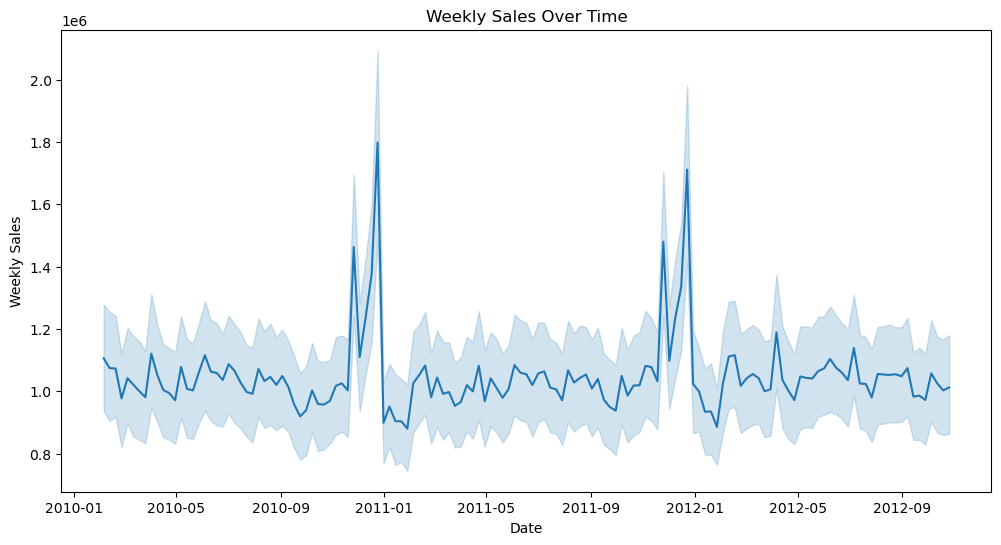

In [81]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

The sales spike during the festive season and significantly drop in the month of January

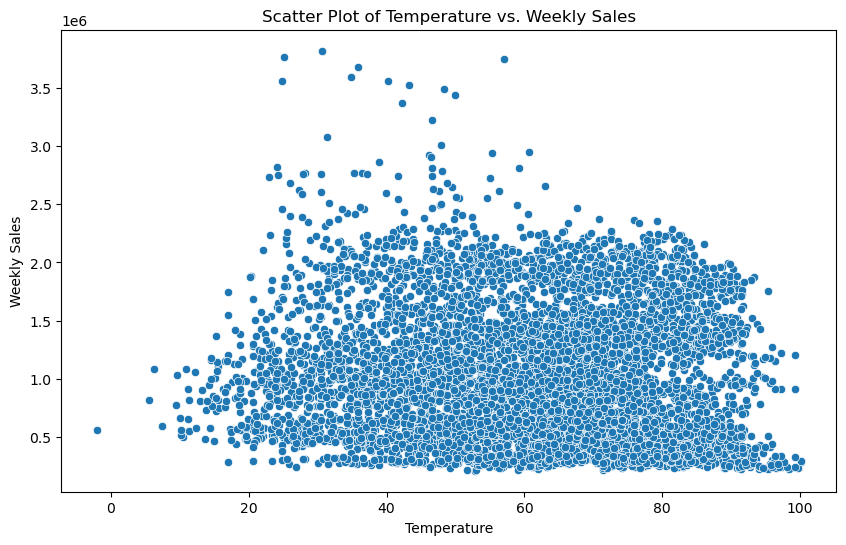

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Scatter Plot of Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

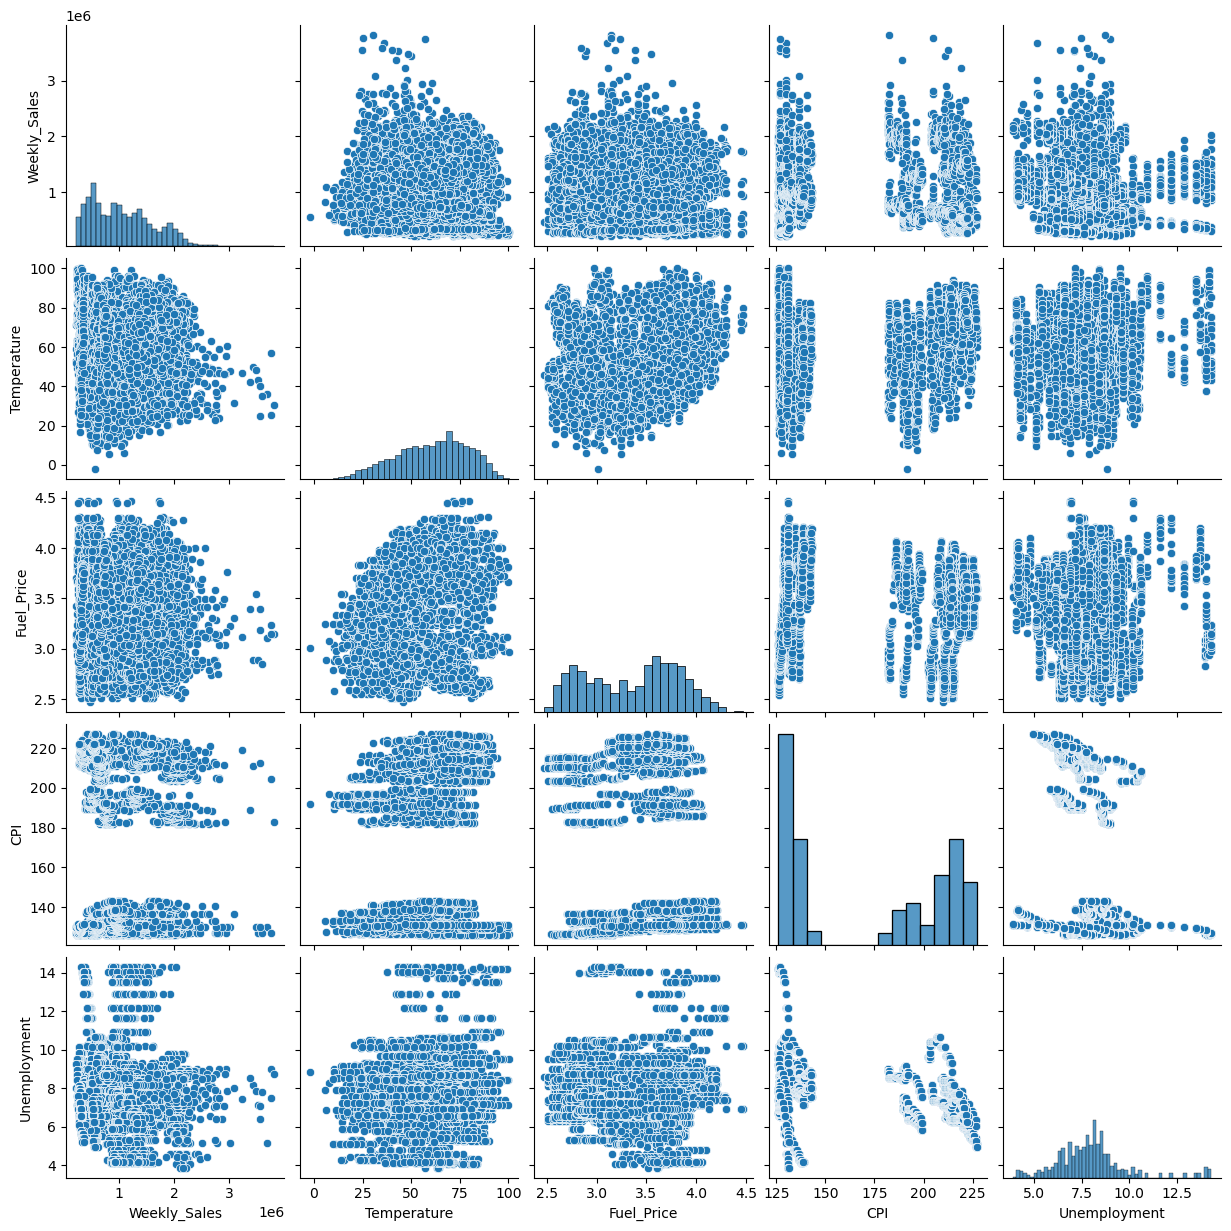

In [83]:
sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()

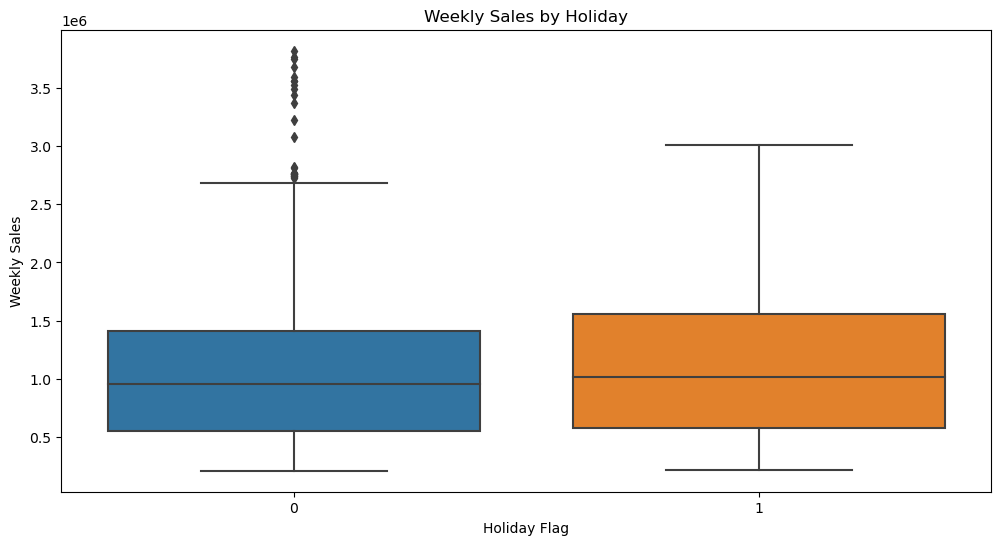

In [84]:
#Visualizing sales statistics on normal days and holidays 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales by Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

Avergae sale are higher during holidays as compared to non-holiday days

<Axes: xlabel='Month'>

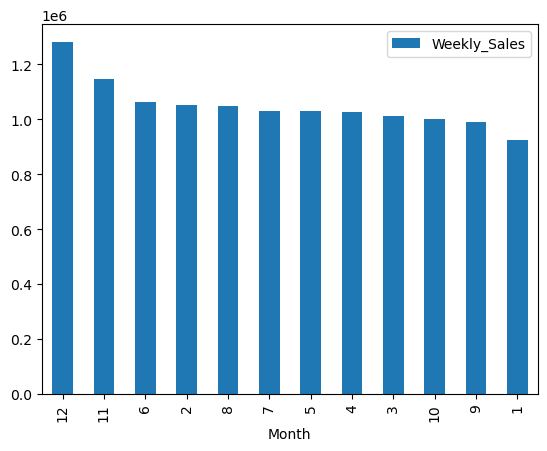

In [85]:
data[['Month','Weekly_Sales']].groupby(['Month'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

In [86]:
data[['Year','Weekly_Sales']].groupby(['Year'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)

,Weekly_Sales
Year,
2010,1.059670e+06
2011,1.046239e+06
2012,1.033660e+06


In [87]:
data[['Year','CPI']].groupby(['Year'],as_index=True).mean().sort_values(by='CPI',ascending=False)

,CPI
Year,
2012,175.498781
2011,171.545716
2010,168.101782


Yearly sales total decreased between 2010 to 2012 which corresponds to the increase in cunsumer price index with the sampe period indication less buying power from the customers

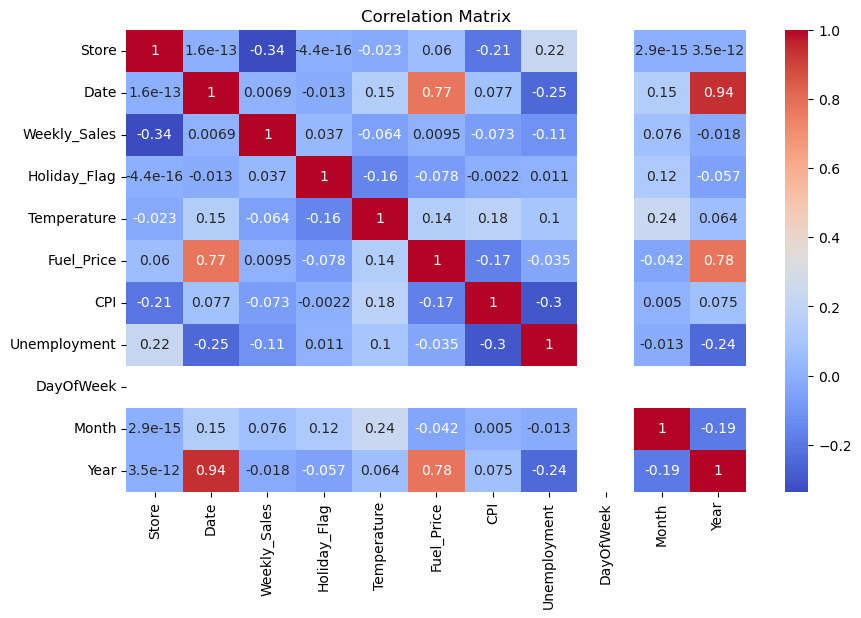

In [88]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time-Series Analysis

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
#visualize the underlying components of the time series, including trend, seasonality, and residual.
decomposition = seasonal_decompose(data['Weekly_Sales'], period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

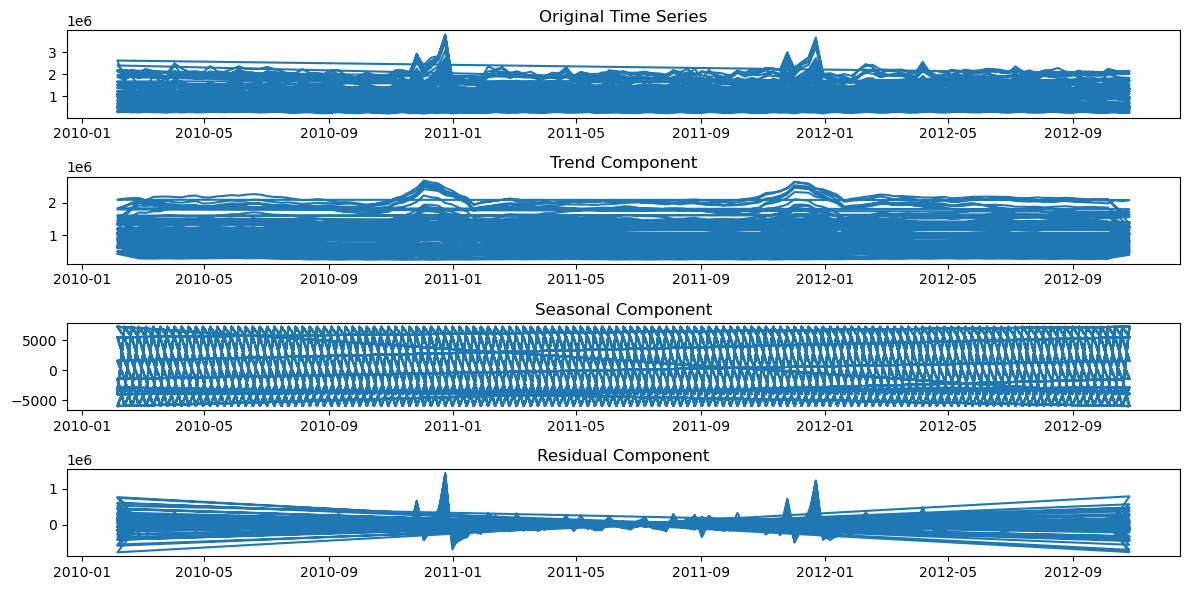

In [90]:
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(data['Date'], data['Weekly_Sales'], label='Original')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(data['Date'], trend, label='Trend')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(data['Date'], seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(data['Date'], residual, label='Residual')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

Analysis:

The "Original Weekly Sales" plot shows the observed weekly sales data.

The "Trend Component" show an upward trend over the festive season which is essentially November and December months.

The "Seasonal Component" plot exhibits monthly seasonality upward and downward patterns.

# Sentiment Analysis

In [91]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [92]:
# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
# Sample data for demonstration purposes
data = {'Review': ['Great prices and products!', 'Poor customer service.', 'I love shopping here.', 'Bad experience overall.']}
df = pd.DataFrame(data)

In [94]:
# Text Cleaning Function
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

In [95]:
# Apply text cleaning
df['Cleaned_Review'] = df['Review'].apply(clean_text)

In [96]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [97]:
# Function to get sentiment score
def get_sentiment(review):
    scores = sid.polarity_scores(review)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [98]:
# Apply sentiment analysis
df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

# Show results
print(df)

                       Review          Cleaned_Review Sentiment
0  Great prices and products!   great prices products  Positive
1      Poor customer service.   poor customer service  Negative
2       I love shopping here.           love shopping  Positive
3     Bad experience overall.  bad experience overall  Negative


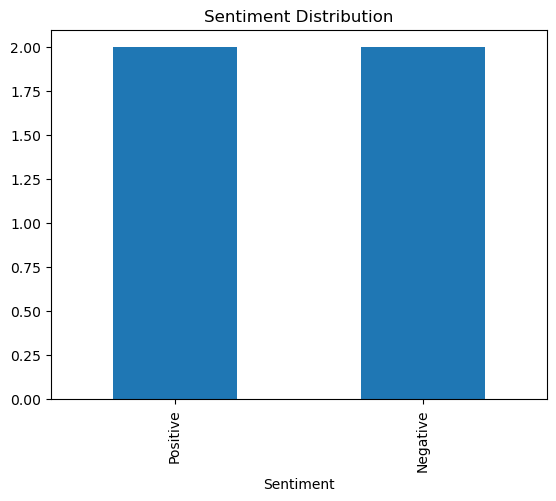

In [99]:
# Visualize sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.show()

# Clustering and Classification

In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix

In [101]:
# Sample data for demonstration purposes
data = {
    'Product_Category': ['Grocery', 'Electronics', 'Clothing', 'Grocery', 'Electronics', 'Clothing'],
    'Sales': [200, 400, 300, 150, 500, 250],
    'Discount': [10, 5, 20, 15, 10, 5],
    'Customer_Age': [34, 45, 23, 36, 29, 42],
    'Customer_Segment': ['Regular', 'Premium', 'Regular', 'New', 'New', 'Premium']
}
df = pd.DataFrame(data)

In [102]:
# Encode categorical variables for clustering
label_encoder = LabelEncoder()
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])
df['Customer_Segment'] = label_encoder.fit_transform(df['Customer_Segment'])

In [103]:
# Feature Selection for Clustering
X = df[['Product_Category', 'Sales', 'Discount', 'Customer_Age']]

In [104]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
# Clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [106]:
# Evaluate Clustering using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score for K-Means Clustering: {silhouette_avg:.2f}')

Silhouette Score for K-Means Clustering: 0.37


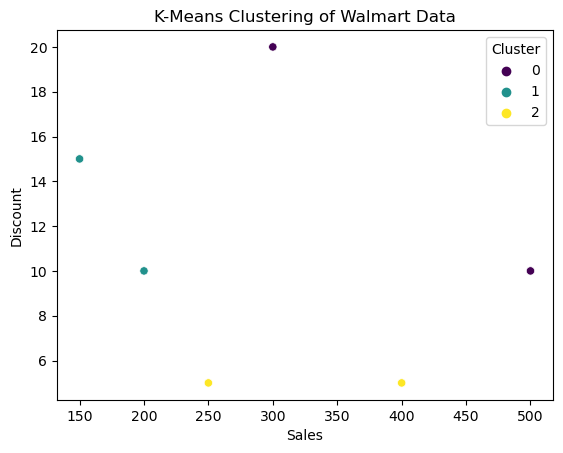

In [107]:
# Visualize Clustering Results
sns.scatterplot(x='Sales', y='Discount', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Walmart Data')
plt.show()

In [108]:
# Prepare data for classification
X_class = df[['Product_Category', 'Sales', 'Discount', 'Customer_Age']]
y_class = df['Customer_Segment']

In [109]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [110]:
# Classification with Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Evaluate Classification Results
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 0 0]
 [1 0 0]
 [1 0 0]]


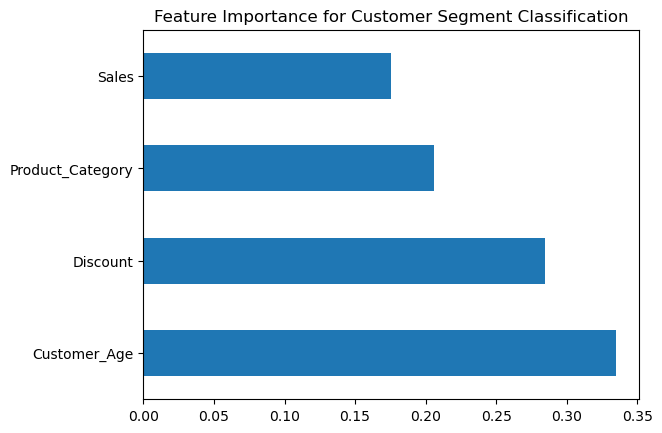

In [111]:
# Visualize Feature Importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_class.columns)
feature_importances.nlargest(4).plot(kind='barh')
plt.title('Feature Importance for Customer Segment Classification')
plt.show()